In [69]:
#pip install numpy
#pip install pandas
#pip install matplotlib
#pip install seaborn
#pip install scikit-learn
#pip install xgboost
#pip install lightgbm
#pip install catboost

In [70]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split

from sklearn.preprocessing import LabelEncoder, RobustScaler

from sklearn.linear_model import Lasso, Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score


import warnings
warnings.filterwarnings('ignore')

In [71]:
def load_data():
  red = pd.read_csv("https://github.com/ASapayev/wine_CSV/raw/main/Red.csv")
  red['Type'] = 'red'
  sparkling = pd.read_csv("https://github.com/ASapayev/wine_CSV/raw/main/Sparkling.csv")
  sparkling['Type'] = 'sparkling'
  white = pd.read_csv("https://github.com/ASapayev/wine_CSV/raw/main/White.csv")
  white['Type'] = 'white'
  rose = pd.read_csv("https://github.com/ASapayev/wine_CSV/raw/main/Rose.csv")
  rose['Type'] = 'rose'
  return pd.concat([red, sparkling, white, rose], ignore_index=True)

In [72]:
wines = load_data()

# **Aralashtirib tashash kerak**

In [73]:
wines

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,red
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,red
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,red
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,red
...,...,...,...,...,...,...,...,...,...
13829,Côte des Roses Rosé 2019,France,Languedoc,Gérard Bertrand,3.9,1750,9.36,2019,rose
13830,M Rosé 2019,France,Côtes de Provence,Minuty,4.0,2046,12.85,2019,rose
13831,Whispering Angel Rosé 2019,France,Côtes de Provence,Château d'Esclans,4.2,2990,16.47,2019,rose
13832,Vinho Verde Rosé N.V.,Portugal,Vinho Verde,Casal Garcia,3.5,9493,4.35,N.V.,rose


In [74]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             13834 non-null  object 
 1   Country          13834 non-null  object 
 2   Region           13834 non-null  object 
 3   Winery           13834 non-null  object 
 4   Rating           13834 non-null  float64
 5   NumberOfRatings  13834 non-null  int64  
 6   Price            13834 non-null  float64
 7   Year             13834 non-null  object 
 8   Type             13834 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 972.8+ KB


In [75]:
wines.Year.value_counts().sort_index()

1961       3
1988       1
1989       2
1990       2
1991       1
1992       3
1993       2
1995       4
1996       6
1997       7
1998       7
1999      19
2000      19
2001      12
2002      11
2003      15
2004      34
2005     160
2006      64
2007      60
2008     101
2009      99
2010     192
2011     312
2012     423
2013     624
2014     905
2015    1678
2016    2294
2017    2412
2018    2723
2019     893
2020       2
N.V.     744
Name: Year, dtype: int64

In [76]:
wines.Year = wines.Year.replace('N.V.', 2024).astype("int")
wines['Name'] = wines['Name'].str.split().str[:-1].str.join(' ')

wines

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type
0,Pomerol,France,Pomerol,Château La Providence,4.2,100,95.00,2011,red
1,Lirac,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,red
2,Erta e China Rosso di Toscana,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,red
3,Bardolino,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,red
4,Ried Scheibner Pinot Noir,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,red
...,...,...,...,...,...,...,...,...,...
13829,Côte des Roses Rosé,France,Languedoc,Gérard Bertrand,3.9,1750,9.36,2019,rose
13830,M Rosé,France,Côtes de Provence,Minuty,4.0,2046,12.85,2019,rose
13831,Whispering Angel Rosé,France,Côtes de Provence,Château d'Esclans,4.2,2990,16.47,2019,rose
13832,Vinho Verde Rosé,Portugal,Vinho Verde,Casal Garcia,3.5,9493,4.35,2024,rose


In [77]:
def print_summarize_dataset(dataset):
    print('Dataset shape: ', dataset.shape, '\n\n')
    print('Dataset info:', dataset.info(), '\n\n')
    print('Data summarize:\n', dataset.describe(), '\n\n')
    print('Total countries', dataset.Country.nunique(), '\n\n')
    print(dataset.Country.value_counts())
print_summarize_dataset(wines)

Dataset shape:  (13834, 9) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             13834 non-null  object 
 1   Country          13834 non-null  object 
 2   Region           13834 non-null  object 
 3   Winery           13834 non-null  object 
 4   Rating           13834 non-null  float64
 5   NumberOfRatings  13834 non-null  int64  
 6   Price            13834 non-null  float64
 7   Year             13834 non-null  int64  
 8   Type             13834 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 972.8+ KB
Dataset info: None 


Data summarize:
              Rating  NumberOfRatings         Price          Year
count  13834.000000     13834.000000  13834.000000  13834.000000
mean       3.865664       428.322466     33.024850   2015.987205
std        0.296427      1838.413812     70.899893      3.

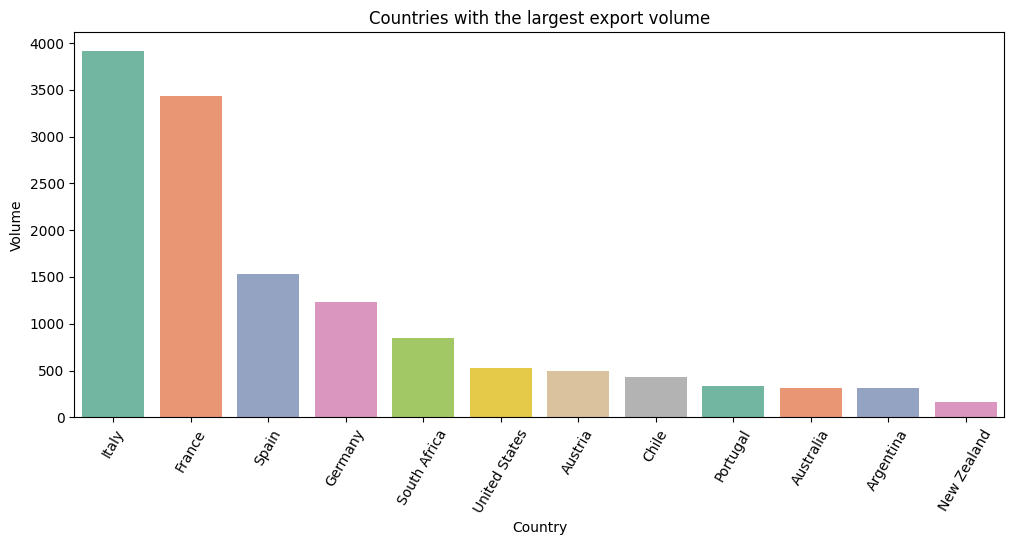

In [78]:
country = wines.Country.value_counts()[:12]

plt.figure(figsize=(12,5))
sns.barplot( y=country.values, x=country.index, palette=sns.color_palette("Set2", 12))
plt.xticks(rotation=60)
plt.title('Countries with the largest export volume')
plt.xlabel("Country")
plt.ylabel("Volume")
plt.show()

In [79]:
wines.corr()

,Rating,NumberOfRatings,Price,Year
Rating,1.000000,0.065520,0.450654,-0.309772
NumberOfRatings,0.065520,1.000000,0.021794,0.087352
Price,0.450654,0.021794,1.000000,-0.337660
Year,-0.309772,0.087352,-0.337660,1.000000


<Axes: >

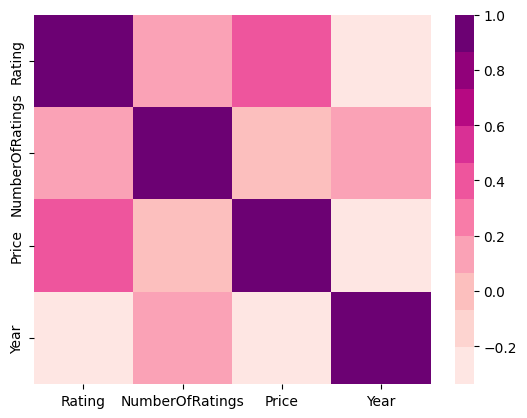

In [80]:
sns.heatmap(wines.corr(), cmap=sns.color_palette("RdPu", 10))

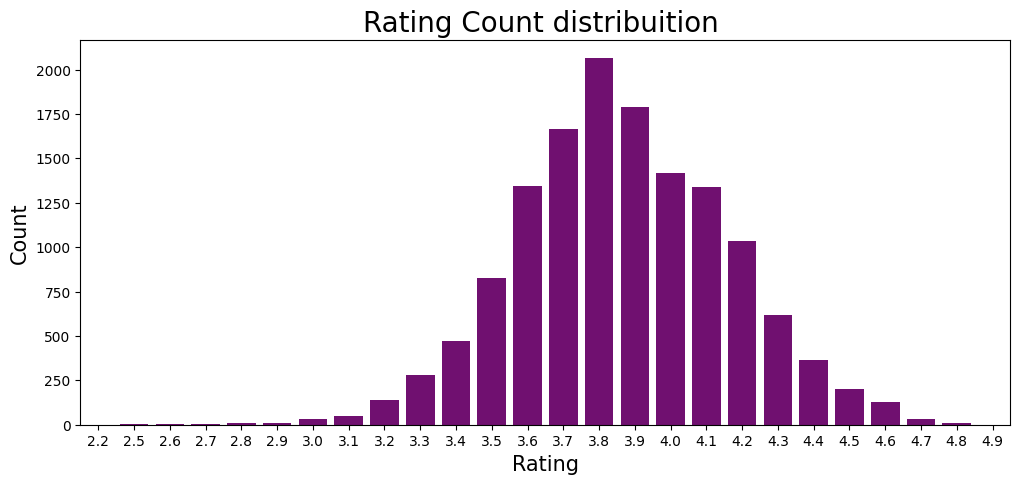

In [81]:
plt.figure(figsize=(12, 5))
sns.countplot(data=wines, x='Rating', color='purple')
plt.title("Rating Count distribuition ", fontsize=20)
plt.xlabel("Rating", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

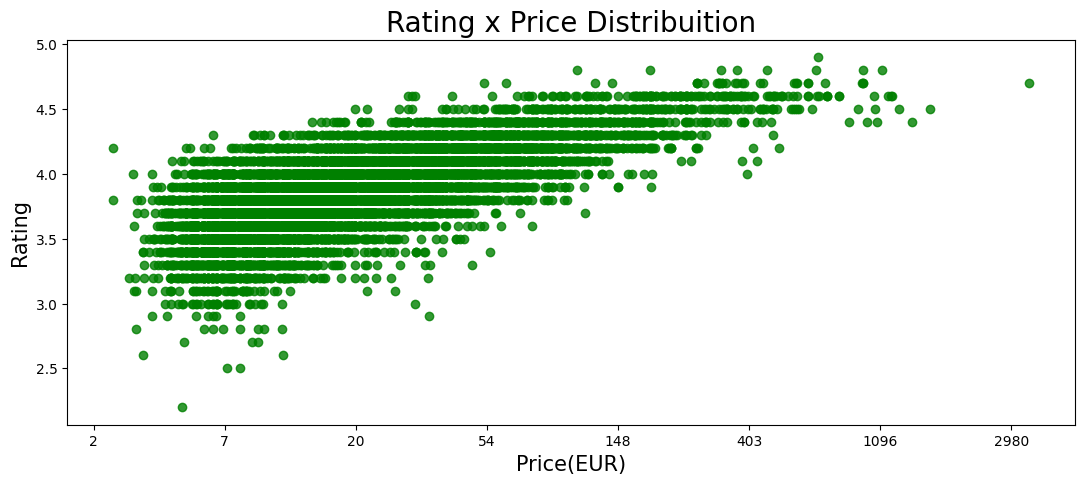

In [82]:
plt.figure(figsize=(13,5))

graph = sns.regplot(x=np.log(wines['Price']), y='Rating',
                    data=wines, fit_reg=False, color='green')
graph.set_title("Rating x Price Distribuition", fontsize=20)
graph.set_xlabel("Price(EUR)", fontsize= 15)
graph.set_ylabel("Rating", fontsize= 15)
graph.set_xticklabels(np.exp(graph.get_xticks()).astype(int))

plt.show()

In [83]:
varieties = pd.read_csv("https://github.com/ASapayev/wine_CSV/raw/main/Varieties.csv")
varieties

,Variety
0,Abouriou
1,Abrustine
2,Absinthe
3,Acadie Blanc
4,Acolon
...,...
1507,Zengő
1508,Zéta
1509,Zeusz
1510,Žilavka


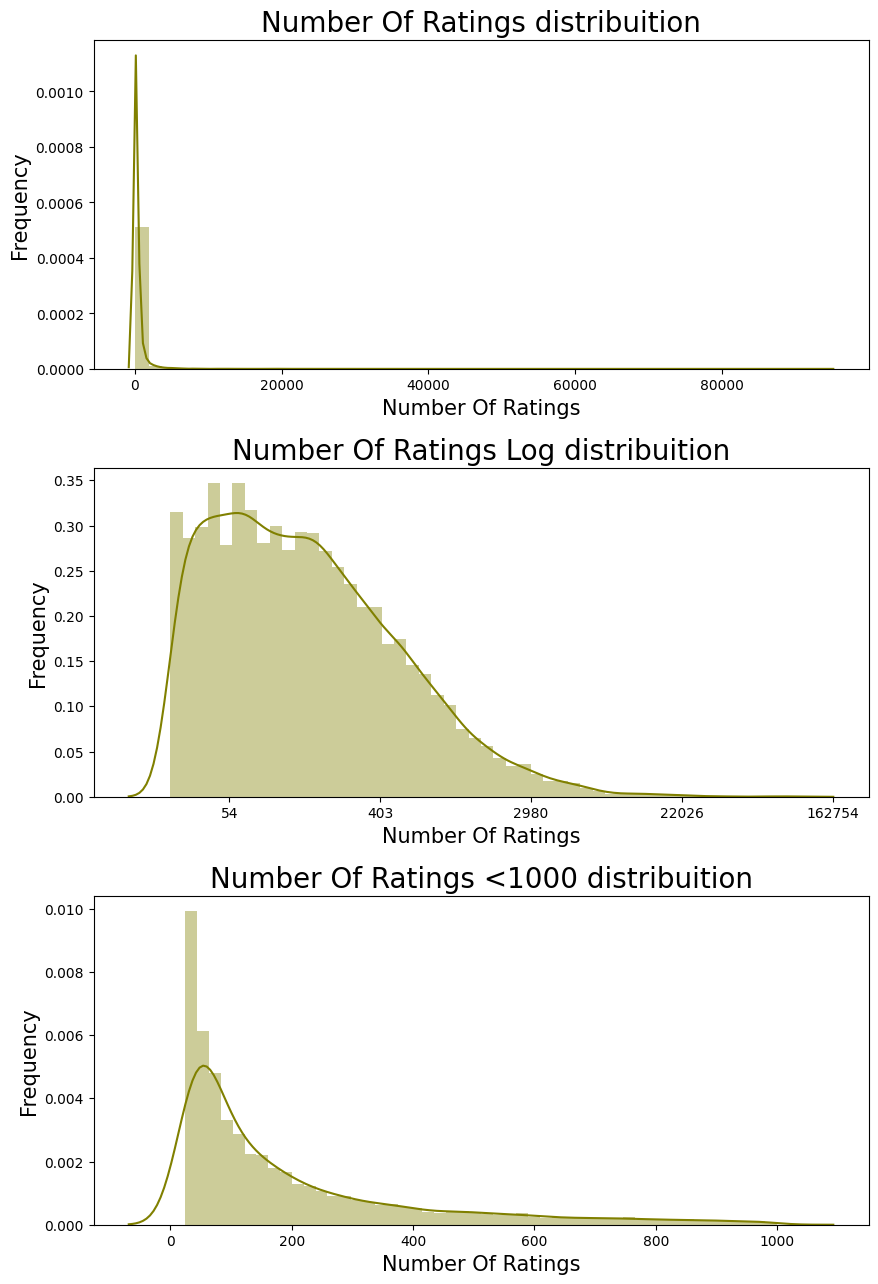

In [84]:
plt.figure(figsize=(10,15))

plt.subplot(3,1,1)
graph = sns.distplot(wines['NumberOfRatings'], color='olive')
graph.set_title("Number Of Ratings distribuition", fontsize=20)
graph.set_xlabel("Number Of Ratings", fontsize=15)
graph.set_ylabel("Frequency", fontsize=15)

plt.subplot(3,1,2)
graph1 = sns.distplot(np.log(wines['NumberOfRatings']), color='olive')
graph1.set_title("Number Of Ratings Log distribuition", fontsize=20)
graph1.set_xlabel("Number Of Ratings", fontsize=15)
graph1.set_ylabel("Frequency", fontsize=15)
graph1.set_xticklabels(np.exp(graph1.get_xticks()).astype(int))

plt.subplot(3,1,3)
graph = sns.distplot(wines[wines['NumberOfRatings']<1000]['NumberOfRatings'], color='olive')
graph.set_title("Number Of Ratings <1000 distribuition", fontsize=20)
graph.set_xlabel("Number Of Ratings", fontsize=15)
graph.set_ylabel("Frequency", fontsize=15)

plt.subplots_adjust(hspace = 0.3,top = 0.9)
plt.show()

In [85]:
wines['Variety'] = np.nan
for index in wines.index:
    for variety in varieties['Variety']:
        if variety in wines.loc[index, 'Name']:
            wines.loc[index, 'Variety'] = variety
            break

In [86]:
print('Now we have variety for', wines.Variety.notna().sum(),'wines,',
      '%s%%' % int(wines.Variety.notna().sum()/len(wines)*100), 'of all')

Now we have variety for 5769 wines, 41% of all


In [87]:
# replace NaN's
wines.Variety = wines.Variety.fillna('unknown')

In [88]:
wines_enc = wines.copy().drop(columns = ['Name'])

In [89]:
#One-hot encoder for winestyle
wines_enc = pd.get_dummies(wines_enc, columns = ['Type'])

In [90]:
wines_enc

,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Variety,Type_red,Type_rose,Type_sparkling,Type_white
0,France,Pomerol,Château La Providence,4.2,100,95.00,2011,unknown,1,0,0,0
1,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,unknown,1,0,0,0
2,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,unknown,1,0,0,0
3,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,unknown,1,0,0,0
4,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,Pinot Noir,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13829,France,Languedoc,Gérard Bertrand,3.9,1750,9.36,2019,unknown,0,1,0,0
13830,France,Côtes de Provence,Minuty,4.0,2046,12.85,2019,unknown,0,1,0,0
13831,France,Côtes de Provence,Château d'Esclans,4.2,2990,16.47,2019,unknown,0,1,0,0
13832,Portugal,Vinho Verde,Casal Garcia,3.5,9493,4.35,2024,unknown,0,1,0,0


In [91]:
categorical_cols = [col for col in wines_enc.columns if wines_enc[col].dtype == "object"]

In [92]:
# Apply label encoder
label_encoder = LabelEncoder()
for col in categorical_cols:
    wines_enc[col] = label_encoder.fit_transform(wines_enc[col])

In [93]:
wines_enc.head()

,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Variety,Type_red,Type_rose,Type_sparkling,Type_white
0,10,574,791,4.2,100,95.00,2011,208,1,0,0,0
1,10,404,891,4.3,100,15.50,2017,208,1,0,0,0
2,16,748,2809,3.9,100,7.45,2015,208,1,0,0,0
3,16,61,559,3.5,100,8.72,2019,208,1,0,0,0
4,2,143,2289,3.9,100,29.15,2016,146,1,0,0,0


In [94]:
y = wines_enc['Rating']
X = wines_enc.drop(['Rating'], axis = 1)

In [95]:
kfolds = KFold(n_splits=6, shuffle=True, random_state=0)
def cv_mae(model, X=X, y=y):
    mae = -cross_val_score(model, X, y, scoring="neg_mean_absolute_error", cv=kfolds)
    return mae

In [96]:
lightgbm = LGBMRegressor(objective='regression',
                         metric='mean_absolute_error',
                         num_leaves=10,
                         learning_rate=0.05,
                         n_estimators=3000,
                         max_depth=5,
                         max_bin=400,
                         bagging_fraction=0.75,
                         bagging_freq=5,
                         bagging_seed=7,
                         reg_alpha=0.7,
                         reg_lambda=1.2,
                         feature_fraction=0.6,
                         feature_fraction_seed=7,
                         verbose=-1,
                         min_data_in_leaf=3,
                         min_sum_hessian_in_leaf=11
                         )
xgboost = XGBRegressor(n_estimators=3000,
                       learning_rate=0.02,
                       max_depth=5,
                       min_child_weight=2,
                       subsample=0.8,
                       colsample_bytree=0.7,
                       nthread=-1,
                       gamma=0,
                       reg_alpha=0.1,
                       reg_lambda=1.8
                       )
catboost = CatBoostRegressor(iterations=3000,
                             learning_rate=0.03,
                             depth=6,
                             l2_leaf_reg = 2,
                             verbose=0
                            )


In [97]:
maes_lgbm = cv_mae(lightgbm)
print('Average lightgbm mae:', np.average(maes_lgbm), ' Standard deviation: ', np.std(maes_lgbm))

Average lightgbm mae: 0.13553357412777212  Standard deviation:  0.002296639819384284


In [98]:
maes_xgb = cv_mae(xgboost)
print('Average xgboost mae:', np.average(maes_xgb), ' Standard deviation: ', np.std(maes_xgb))

Average xgboost mae: 0.13473465357103034  Standard deviation:  0.0021621197804363133


In [99]:
maes_catboost = cv_mae(catboost)
print('Average catboost mae:', np.average(maes_catboost), ' Standard deviation: ', np.std(maes_catboost))

Average catboost mae: 0.1342509719537001  Standard deviation:  0.0017666371675728327


In [100]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,150,200,250,300]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_absolute_error',cv=kfolds)
lasso_regressor.fit(X,y)
print('Best lasso mae:', -lasso_regressor.best_score_,'with',lasso_regressor.best_params_)

Best lasso mae: 0.19953624633326986 with {'alpha': 1e-08}


In [101]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,150,200,250,300]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_absolute_error',cv=kfolds)
ridge_regressor.fit(X,y)
print('Best ridge mae:', -ridge_regressor.best_score_,'with',ridge_regressor.best_params_)

Best ridge mae: 0.19953356010176815 with {'alpha': 40}


In [102]:
wines_enc['NumberOfRatings'].sort_values()[int(0.1*(len(wines_enc))):int(0.9*(len(wines_enc)))]

10263     35
10254     35
10265     35
10266     35
10267     35
        ... 
7979     827
7978     827
13335    827
13336    827
7981     828
Name: NumberOfRatings, Length: 11067, dtype: int64

In [103]:
wines_low_NumberOfRatings = wines_enc[wines_enc['NumberOfRatings']<35]
wines_high_NumberOfRatings = wines_enc[wines_enc['NumberOfRatings']>838]
wines_mid_NumberOfRatings = wines_enc[wines_enc['NumberOfRatings']>35][wines_enc['NumberOfRatings']<838]


In [104]:
X_low_NumberOfRatings_test = wines_low_NumberOfRatings.drop(['NumberOfRatings','Rating'], axis = 1)
y_low_NumberOfRatings_test = wines_low_NumberOfRatings['Rating']

X_high_NumberOfRatings_test = wines_high_NumberOfRatings.drop(['NumberOfRatings','Rating'], axis = 1)
y_high_NumberOfRatings_test = wines_high_NumberOfRatings['Rating']

X_mid = wines_mid_NumberOfRatings.drop(['NumberOfRatings','Rating'], axis = 1)
y_mid = wines_mid_NumberOfRatings['Rating']
X_train, X_random_test, y_train, y_random_test = train_test_split(X_mid, y_mid, test_size=len(X_low_NumberOfRatings_test))

In [105]:
print('Train data size:', len(X_train))
print('Test data sizes:', len(X_low_NumberOfRatings_test), len(X_high_NumberOfRatings_test), len(X_random_test))

Train data size: 9614
Test data sizes: 1369 1366 1369


In [106]:
lgbm = lightgbm.fit(X_train, y_train)
res_low_NumberOfRatings = lgbm.predict(X_low_NumberOfRatings_test)
res_high_NumberOfRatings = lgbm.predict(X_high_NumberOfRatings_test)
res_random_NumberOfRatings = lgbm.predict(X_random_test)

In [107]:
print('MAE of predictions with low NumberOfRatings:   ', mean_absolute_error(y_low_NumberOfRatings_test, res_low_NumberOfRatings))
print('MAE of predictions with high NumberOfRatings:  ', mean_absolute_error(y_high_NumberOfRatings_test, res_high_NumberOfRatings))
print('MAE of predictions with middle NumberOfRatings:', mean_absolute_error(y_random_test, res_random_NumberOfRatings))

MAE of predictions with low NumberOfRatings:    0.17324618552075194
MAE of predictions with high NumberOfRatings:   0.11636217771113472
MAE of predictions with middle NumberOfRatings: 0.14057734917012368
